In [35]:
from gamefitter import *
import pandas as pd
import pickle
population = pickle.load(open('./data/optimization/population_edgeval_1.499.pickle','rb'))
population.sort(key=lambda x: x['error'])
for p in population:
    print(p['error'], len(p['topology']), p['alpha'])

1.4998973325224825 40 0.0015192957631572305
1.5099723113876617 51 0.0016208361991178915
1.5170173098423334 42 0.0016301259827493498
1.5170173098423334 42 0.0016301259827493498
1.5197689793852391 42 0.0016301259827493498
1.5199070541909703 36 0.0015192957631572305
1.5199070541909703 36 0.0015192957631572305
1.520008606435675 43 0.0016301259827493498
1.533377991150116 49 0.0011102527592696937
1.533377991150116 49 0.0011102527592696937
1.5336629801218915 51 0.001346408958974628
1.5336629801218915 51 0.001346408958974628
1.5338538178162389 43 0.0016301259827493498
1.5338538178162389 43 0.0016301259827493498
1.5364941720868572 54 0.001346408958974628
1.5391145423353851 53 0.001346408958974628
1.543489172217966 57 0.0013260974011538146
1.5514116134978841 45 0.00043923222250141043
1.5592262354775257 56 0.0013734297128075367
1.5730969513552062 68 0.0002836204137297519
1.5762313185916326 69 0.0002414171065789573
1.5824544617771457 42 0.0016374137801935078
1.5851879044605846 41 0.001337152625943

In [66]:
# look at the game graph
from collections import defaultdict
hypothesis = population[0]
game_settings = {
            "start_populations_matrix": hypothesis['starting_state'],
            "topology": hypothesis['topology'],
            'alpha': hypothesis['alpha'],
            'log_level': "warning",
            'player_labels':hypothesis['player_labels']
        }
game = PolymatrixGame(**game_settings)
print(hypothesis['strategies'])
#d = defaultdict()
hypothesis['strategies'][9][0][1]=0

states = {year:None for year in range(2009,2019)}
states[2008] = np.rint(np.sum(game.state, axis=1))
d = {year:None for year in range(2009,2019)}
d['COUNTRY']=hypothesis['player_labels']
d[2008] = [0]*27
for i, s in enumerate(hypothesis['strategies']):
    game.play(s[0])
    states[2009+i] = np.rint(np.sum(game.state, axis=1))
    d[2009+i] = states[2009+i]-states[2008+i]
df_scores = pd.DataFrame(d)
df_scores
    

[array([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1]]), array([[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0]]), array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 0]]), array([[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0]]), array([[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0]]), array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0]]), array([[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1]]), array([[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0]]), array([[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0]]), array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1]])]

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,COUNTRY,2008
0,5.0,2.0,6.0,6.0,3.0,3.0,5.0,4.0,0.0,3.0,Germany,0
1,10.0,18.0,15.0,14.0,12.0,8.0,7.0,12.0,2.0,2.0,Luxembourg,0
2,-13.0,-8.0,-13.0,-16.0,-7.0,3.0,-9.0,-15.0,0.0,-6.0,Netherlands,0
3,-2.0,-1.0,-1.0,-1.0,-3.0,-3.0,-5.0,3.0,-4.0,-1.0,Italy,0
4,0.0,-19.0,-7.0,-7.0,-8.0,-8.0,-1.0,-6.0,-9.0,-4.0,United Kingdom,0
5,0.0,-1.0,-4.0,-4.0,0.0,-2.0,-1.0,-4.0,-4.0,-1.0,France,0
6,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,Austria,0
7,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,Sweden,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Finland,0
9,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,Cyprus,0


48


<IPython.core.display.Javascript object>


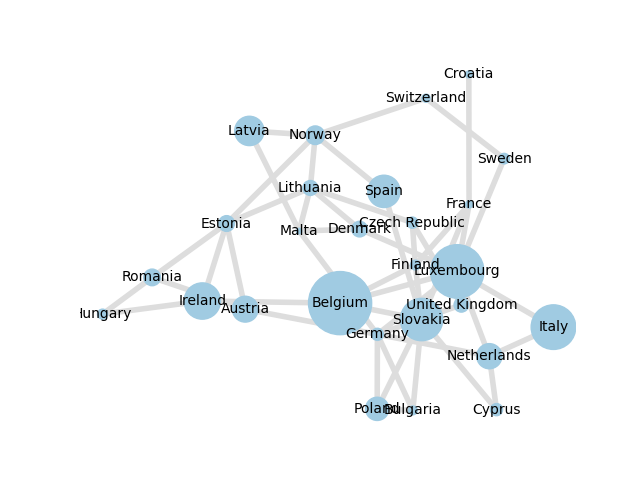

In [33]:
country_names = hypothesis['player_labels']
node_sizes = [sum(i)/100 for i in hypothesis['starting_state']]

def visualize_kg(G):
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    # TODO: add edge labels
    %matplotlib nbagg
    import matplotlib.pyplot as plt

    import networkx as nx
    
    def remove_duplicates(x):
        return list(dict.fromkeys(x))

    edges = remove_duplicates(list(G.edges()))
    m = len(edges)
    nodes = list(G.nodes())
    n = len(nodes)
    print(len(edges))
    pos=nx.spring_layout(G) # positions for all nodes
    
    # some math labels
    labels={}
    for node in nodes:
        labels[node] = str(country_names[node])
    
    colors=['#DDDDDD']*m
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    nx.draw(G, pos, node_size = node_sizes[0:n], node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Blues, with_labels=False)

    plt.axis('off')
    plt.savefig("labels_and_colors.png") # save as png
    plt.show() # display
visualize_kg(G)

In [14]:
game.state

array([[3.78440e+04, 4.61410e+04],
       [1.84000e+02, 4.48500e+03],
       [8.65800e+03, 1.29144e+05],
       [7.75100e+04, 2.68870e+04],
       [1.83701e+05, 5.16240e+04],
       [2.08360e+04, 3.40140e+04],
       [5.55400e+03, 8.69400e+03],
       [6.73400e+03, 4.38600e+03],
       [3.48600e+03, 3.05700e+03],
       [5.65000e+02, 5.77000e+02],
       [3.31500e+03, 1.15260e+04],
       [1.40700e+03, 1.67000e+03],
       [1.92300e+03, 2.80800e+03],
       [3.21000e+02, 3.00300e+03],
       [2.55100e+03, 1.63470e+04],
       [1.77300e+03, 3.16820e+04],
       [8.52000e+02, 1.46500e+03],
       [1.82110e+04, 1.48830e+04],
       [1.69740e+04, 2.80760e+04],
       [9.67800e+03, 1.33900e+03],
       [5.04900e+03, 2.21000e+02],
       [1.43000e+02, 1.16660e+04],
       [4.99200e+03, 2.47900e+03],
       [2.45200e+03, 6.21000e+02],
       [1.36000e+03, 2.94190e+04],
       [1.23750e+04, 3.43000e+02],
       [3.57640e+04, 4.59200e+03]])

In [67]:
new_pops = []
for p in population:
    for i, arr in enumerate(p['starting_state']):
        for j, elem in enumerate(arr):
            if elem<0:
                p['starting_state'][i][j]=0
    p['error']=None
    new_pops.append(p)
print(len(new_pops))
pickle.dump(new_pops, open('./data/optimization/population_edge_3_11.xx.pickle','wb'))

70


## Crossing over

In [220]:
p1 = population[7]
p1

{'starting_state': [array([ 9, 47]),
  array([12, 34]),
  array([13, 18]),
  array([63,  2]),
  array([ 9, 48]),
  array([ 8, 38]),
  array([67,  2]),
  array([35, 28]),
  array([45, 48]),
  array([56,  9]),
  array([25, 12]),
  array([45, 60]),
  array([50, 20]),
  array([39, 64]),
  array([32, 42]),
  array([18, 18]),
  array([59,  0]),
  array([70, 12])],
 'strategies': [array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]]),
  array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]]),
  array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  array([[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]]),
  array([[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]]),
  array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]]),
  array([[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]),
  array([[1, 0, 1, 0, 

In [211]:
p2 = population[10]

In [228]:
p2['strategies'][1][0][1]

1

In [3]:
from corpgame import PolymatrixGame
import numpy as np
import pickle

def in_list(candidate, full_list):
    for element in full_list:
        if candidate==element:
            return True
    return False


game_settings = {
        "start_populations_matrix": [[5, 10], [5, 5], [15, 5], [15, 5], [30, 5],[3,17]],
        "topology": "chain",
        'alpha': 0.7,
        'log_level': "warning"
    }
game = PolymatrixGame(**game_settings)
self = game.network
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
[(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (4, 5)]


In [39]:
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]
[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]


In [41]:
n = 18
nodes = list(range(n))

edges = [
            [nodes[i], nodes[j]]
            for i in range(len(nodes))
            for j in range(i + 1, len(nodes))
        ]

edges = list(np.random.permutation(list(edges)))
edges

[array([3, 7]),
 array([ 8, 14]),
 array([7, 8]),
 array([ 3, 12]),
 array([11, 17]),
 array([ 9, 14]),
 array([0, 1]),
 array([ 7, 10]),
 array([10, 14]),
 array([12, 15]),
 array([ 3, 10]),
 array([ 2, 14]),
 array([ 1, 11]),
 array([1, 5]),
 array([ 0, 10]),
 array([10, 13]),
 array([ 5, 16]),
 array([5, 6]),
 array([1, 9]),
 array([5, 8]),
 array([5, 9]),
 array([12, 16]),
 array([1, 2]),
 array([4, 9]),
 array([11, 15]),
 array([10, 12]),
 array([4, 7]),
 array([2, 9]),
 array([ 9, 16]),
 array([2, 8]),
 array([2, 4]),
 array([3, 9]),
 array([ 7, 14]),
 array([8, 9]),
 array([ 2, 17]),
 array([0, 5]),
 array([1, 4]),
 array([ 1, 16]),
 array([ 4, 11]),
 array([ 0, 11]),
 array([0, 3]),
 array([ 6, 15]),
 array([ 1, 13]),
 array([ 2, 12]),
 array([ 0, 13]),
 array([1, 8]),
 array([ 6, 10]),
 array([15, 16]),
 array([4, 6]),
 array([3, 6]),
 array([7, 9]),
 array([1, 6]),
 array([0, 2]),
 array([ 2, 16]),
 array([ 1, 17]),
 array([0, 9]),
 array([2, 7]),
 array([ 2, 11]),
 array([6,

In [ ]:
if np.random.randint==
if len(game.network.graph.edges)>(len(game.players)-1):
    game.network.remove_random_edge()
    hypothesis['topology'] = list(game.network.graph.edges)
return hypothesis